# Applied DS LAB 2 - Sentiment Analysis of Reviews

### Data set

A dataset, car_reviews.csv is provided, containing 1,382 rows and two columns:

Sentiment: It is labelled with either ‘Pos’ or ‘Neg’ to indicate whether the review has been assessed as positive or negative in the sentiment it expresses
Review: People have assessed about the cars



In [2]:
import pandas as pd
from nltk.tokenize import sent_tokenize, word_tokenize
import nltk
from nltk.corpus import stopwords
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('stopwords')
import string
from nltk.stem import PorterStemmer
import numpy as np
from sklearn.model_selection import train_test_split
from nltk.stem import WordNetLemmatizer
import matplotlib.pyplot as plt
import seaborn as sns

[nltk_data] Downloading package wordnet to /Users/h/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /Users/h/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /Users/h/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


data = pd.read_csv('./car_reviews.csv')

In [4]:
data

,Sentiment,Review
0,Neg,In 1992 we bought a new Taurus and we really ...
1,Neg,The last business trip I drove to San Franci...
2,Neg,My husband and I purchased a 1990 Ford F250 a...
3,Neg,I feel I have a thorough opinion of this truc...
4,Neg,AS a mother of 3 all of whom are still in ca...
...,...,...
1377,Pos,In June we bought the Sony Limited Edition Fo...
1378,Pos,After 140 000 miles we decided to replace my...
1379,Pos,The Ford Focus is a great little record setti...
1380,Pos,I needed a new car because my hyundai excel 9...


#### Task1) Step1.
Identifying numbers in 'Review' of the data and removing the numbers that are not likely to affect sentiment. 

In [3]:
def without_digits(data):
    return "".join([i for i in data if not i.isdigit()])

In [4]:
data['Review'] = data['Review'].apply(lambda x: without_digits(x))

#### Task1) Step2.
Identifying stopwords(eg.'and','or' etc) and punctuations(eg.',? etc) by making a set and removing them that are not likely to affect sentiment

In [5]:
stop = set(stopwords.words('english') + list(string.punctuation))
data['Review_without'] = data['Review'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

#### Task1) Step3.
Converting remaining words are not case sensitive (i.e. the classifier should not distinguish upper/lower
case characters).

In [6]:
data['Review_without'] = data['Review_without'].str.lower().str.split()

#### Task1) Step4.
Treating minor variations of a word (e.g. ‘fault’, ‘faults’ and ‘faulty’) as instances of the same word (e.g. ‘fault’) when you are using them in your classifier by applying to 'PorterStemmer' and 'WordNetLemmatizer' module for word normalisation.

After applying word normalisation, as you can see, some words are changed.
For example, 
1) loved -> love (row 1)

2) business -> busi (row 2)

3) purchased -> purchas (row 3)

In [7]:
ps = PorterStemmer()
wnl = WordNetLemmatizer()
data['token'] = data['Review_without'].apply(lambda x: [ps.stem(y) for y in x]) # Stem every word.
data['token'] = data['token'].apply(lambda x: [wnl.lemmatize(y) for y in x]) # Lemmatization every word.

In [8]:
data.head()

,Sentiment,Review,Review_without,token
0,Neg,In we bought a new Taurus and we really love...,"[in, bought, new, taurus, really, loved, so, d...","[in, bought, new, tauru, realli, love, so, dec..."
1,Neg,The last business trip I drove to San Franci...,"[the, last, business, trip, i, drove, san, fra...","[the, last, busi, trip, i, drove, san, francis..."
2,Neg,My husband and I purchased a Ford F and had ...,"[my, husband, i, purchased, ford, f, nothing, ...","[my, husband, i, purchas, ford, f, noth, probl..."
3,Neg,I feel I have a thorough opinion of this truc...,"[i, feel, i, thorough, opinion, truck, compare...","[i, feel, i, thorough, opinion, truck, compar,..."
4,Neg,AS a mother of all of whom are still in car...,"[as, mother, still, carseats, logical, thing, ...","[a, mother, still, carseat, logic, thing, trad..."


#### Task1) Step5.
Using a bag of words technique, in which you build a vocabulary of individual words that appear in the dataset once it has been cleaned up. Also, the output to demonstrate that a vector has been created for each review by appearing the number of times that a word/word stem with a small sample of reviews. 

In [9]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from nltk import FreqDist
#convert the neg/pos values to digits(0 or 1) for applying naive bayes.
data['Neg/Pos'] = (data['Sentiment'] == 'Pos')
data['Neg/Pos'] = data['Neg/Pos'].astype(int)
neg_data = data[data['Neg/Pos']==0]

# Create vectorizer
CountVec = CountVectorizer()

#transform
neg_list = []
for i in neg_data['token']:  
    for j in i:
        neg_list.append(j)
    
#the most frequent negative words    
count_neg_word = FreqDist(neg_list)
count_neg_word.most_common(15)

[('i', 8398),
 ('car', 3941),
 ('the', 3051),
 ('ford', 2118),
 ('it', 1266),
 ('like', 1141),
 ('get', 1120),
 ('seat', 1118),
 ('drive', 1100),
 ('problem', 1081),
 ('one', 1080),
 ('vehicl', 1050),
 ('would', 1010),
 ('time', 924),
 ('engin', 917)]

In [10]:
data['Review_without'] = data['token'].apply(lambda x: ' '.join(x))
X = data['Review_without']
y = data['Neg/Pos']

train_X, test_X,train_y, test_y = train_test_split(X, y, test_size=0.2)

print('Training set size:', train_X.shape[0])
print('Test set size:', test_X.shape[0])

Training set size: 1105
Test set size: 277


#### Task1) Step6. 
Showing appropriate Bernoulli Naïve Bayes or Multinomial Naïve Bayes model have been used for classification using existing libraries.

Also, for avoiding data leakage, I only train the model on the training data.

Output:

Recall, Precision, and Accuracy should be high as possible. In this case, precisions are quite similar, but I've seen that higher recall and accuracy in the multinomial Naïve Bayes model compared to the Bernoulli Naïve Bayes model.

In [11]:
vectoriser = TfidfVectorizer(ngram_range=(1,2))
vectoriser.fit(train_X)
train_X = vectoriser.transform(train_X)
test_X = vectoriser.transform(test_X)

In [12]:
def plt_format(test_y, y_pred):
    cf_matrix = confusion_matrix(test_y, y_pred)
    group_names = ['True Neg','False Pos','False Neg','True Pos']
    group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')
    plt.title ("Confusion Matrix")

## Multinomial Naïve Bayes model

              precision    recall  f1-score   support

           0       0.78      0.81      0.79       136
           1       0.81      0.78      0.79       141

    accuracy                           0.79       277
   macro avg       0.79      0.79      0.79       277
weighted avg       0.79      0.79      0.79       277



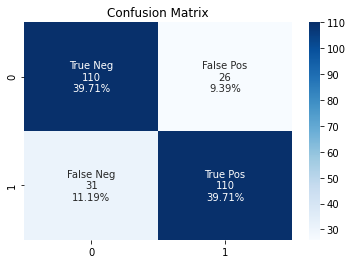

In [13]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import accuracy_score
clf = MultinomialNB()
clf.fit(train_X, train_y)
y_pred_clf = clf.predict(test_X)
plt_format(test_y, y_pred_clf)
print(classification_report(test_y, y_pred_clf))

## Bernoulli Naïve Bayes model

              precision    recall  f1-score   support

           0       0.86      0.52      0.65       136
           1       0.66      0.91      0.77       141

    accuracy                           0.72       277
   macro avg       0.76      0.72      0.71       277
weighted avg       0.76      0.72      0.71       277



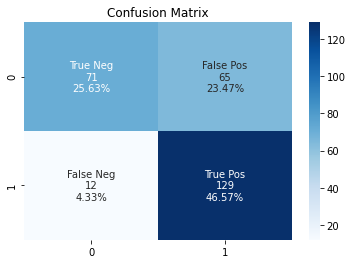

In [14]:
from sklearn.naive_bayes import BernoulliNB
bn = BernoulliNB()
bn.fit(train_X, train_y)
y_pred_bn = bn.predict(test_X)
plt_format(test_y, y_pred_bn)
print(classification_report(test_y, y_pred_bn))

## Task 2

At first, I was trying to improve the initial multinomial Naive Bayes model, however, the methods mentioned on the internet are not suitable such as stemming, gathering more data and etc what is already applied. Therefore, compared to the initial Naïve Bayes classifier, I choose to implement the SVC model(i.e. Support Vector classifier) for improving the performance.
1) SVM is a set of supervised methods used for classification, regression and outliers detection. Also, I used the SVC module, the difference between SVC and SVM is that the objective of a linear SVC(support vector classifier) is to fit the data I provide, returning a "best fit" hyperplane that divides, or categories, and the data. Particularly, this class takes one parameter, which is the kernel type. I take the 'linear' type, which means that simple SVMs can only classify linearly separable data. 

2) The explanation of the process to apply SVMs:
    - Using the fit() method, I called to train the algorithm on the training data, which is passed as a parameter to the fit() method
    - To make predictions, the predict() method is useful.
    - After those processes, to evaluate the algorithm, I print out the confusion matrix, precision, recall and F1 measures. Compared to the above Naive Bayes models, It can be seen that those values in macro and weighted average are slightly higher. 
    
    
#### Legal

The definition of SVM from "Support-vector machine, Wikipedia"
https://en.wikipedia.org/wiki/Support-vector_machine#Linear_SVM

The process of implementing SVC from "Implementing SVM and Kernel SVM with Python's Scikit-Learn"
https://stackabuse.com/implementing-svm-and-kernel-svm-with-pythons-scikit-learn/

Difference between SVC and SVM from "Linear SVC machine, learning SVM examples with Python"
https://pythonprogramming.net/linear-svc-example-scikit-learn-svm-python/

              precision    recall  f1-score   support

           0       0.82      0.81      0.81       136
           1       0.82      0.83      0.82       141

    accuracy                           0.82       277
   macro avg       0.82      0.82      0.82       277
weighted avg       0.82      0.82      0.82       277



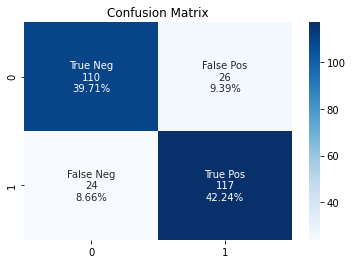

In [15]:
from sklearn.svm import SVC
svclassifier = SVC(kernel='linear')
svclassifier.fit(train_X, train_y)
y_pred_svm = svclassifier.predict(test_X)
plt_format(test_y, y_pred_svm)
print(classification_report(test_y, y_pred_svm))